In [1]:
from __future__ import absolute_import, print_function, unicode_literals
import sys
import os
import repackage
repackage.up()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from importlib import reload
import spot2intensity.correlation_significance as ss
import analysis2 as a2
from IPython.display import display, HTML
sys.path.append('/home/janekg89/Develop/Pycharm_Projects/flutype_webapp')
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "flutype_webapp.settings")
import django
django.setup()
from flutype.models import Spot

/home/janek89/Envs/flutype_webapp/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


****************************************
RUNNING IN DEVELOP
****************************************


In [2]:
cs = ["slide_21","slide_22","slide_26","slide_27","slide_31","slide_32","slide_36","slide_23","slide_28","slide_33","slide_37"]
spots_dj = Spot.objects.filter(raw_spot__raw_spot_collection__sid__in=cs)
#spots_dj = spots_dj.filter(raw_spot__lig_fix_batch__sid__in = lb)
spots_dj = spots_dj.filter(spot_collection__sid = "quant1")
spots_dj = spots_dj.filter(circle_quality__gte = 0.3)

In [3]:
np.random.RandomState(12345)

In [4]:
reload(a2)
reload(ss)

<module 'spot2intensity.correlation_significance' from '/home/janek89/Dev/flutype_analysis_web/spot2intensity/correlation_significance.py'>

In [5]:
data = a2.Data(spots_dj=spots_dj).outlier_filtering().sample_on_collection(200).clean()

/home/janek89/Dev/flutype_analysis_web/preprocessing.py:14: RuntimeWarning: invalid value encountered in double_scalars
  modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y for y in ys]


In [6]:
lb = data.ligand_batch_significance().groupby("Ligand Batch").apply(lambda x: x["Significance"].max()).sort_values(ascending=False)
lb

Ligand Batch
P106       6.035764e-02
P048       2.841606e-02
P047       9.947117e-03
P094       4.021668e-03
P084       3.957767e-05
P009       6.479017e-10
P043       1.170721e-11
P088       1.564483e-12
P080       1.008460e-24
P105       1.802061e-27
P073       3.427951e-32
P055       1.100157e-36
P063       2.078751e-63
P083       3.785938e-69
P104       1.704430e-85
P086       3.643630e-99
P045.3    2.117987e-108
P102      3.223109e-117
P122      6.646933e-157
P095      8.565445e-173
P101      2.178397e-226
P131.2    8.042690e-231
P098      4.277314e-233
P100      4.943625e-250
P060      7.027141e-272
P124       0.000000e+00
P096       0.000000e+00
Nenad      0.000000e+00
P008       0.000000e+00
P121       0.000000e+00
P010       0.000000e+00
P103       0.000000e+00
P044       0.000000e+00
P050       0.000000e+00
P081       0.000000e+00
P054       0.000000e+00
P090       0.000000e+00
P056       0.000000e+00
P057       0.000000e+00
P059       0.000000e+00
P061       0.000000e+00
P08

In [7]:
pbs = [list(lb.index.values[:i]) for i in range(1,len(lb.index.values))]
pbs_len =  [len(lb.index.values[:i]) for i in range(1,len(lb.index.values))]
#lb

In [11]:
pbs[0]
spots_this = spots_dj.filter(raw_spot__lig_fix_batch__sid__in = pbs[0])
data = a2.Data(spots_dj=spots_this)
data.x.groupby("Collection").count()

/home/janek89/Dev/flutype_analysis_web/analysis2.py:130: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  comb.set_value(i, "Test", row)
/home/janek89/Dev/flutype_analysis_web/analysis2.py:131: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  comb.set_value(i, "Train", tuple(set(cs) - set(row)))


Ligand Batch,P084
Collection,
slide_21,9
slide_22,9
slide_23,9
slide_26,9
slide_27,9
slide_28,9
slide_31,9
slide_32,9
slide_33,9


In [22]:
frames = []
frames = []
data = a2.Data(spots_dj=spots_dj)
data = data.outlier_filtering().sample_on_collection(20).clean()

for pb in pbs[:40]:
    ana = a2.Analysis(data.subset_ligand_batches(pb))
    ana.calculate_all()
    frames.append(ana.complete_information())


/home/janek89/Dev/flutype_analysis_web/analysis2.py:130: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  comb.set_value(i, "Test", row)
/home/janek89/Dev/flutype_analysis_web/analysis2.py:131: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  comb.set_value(i, "Train", tuple(set(cs) - set(row)))
/home/janek89/Dev/flutype_analysis_web/preprocessing.py:14: RuntimeWarning: invalid value encountered in double_scalars
  modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y for y in ys]


*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models****

In [23]:
result = pd.concat(frames , keys =pbs_len)
result.index.names = ["Peptide Batches", 'Analyte Batch',"Collection", "Sample"]
result_mean = result.reset_index().groupby(["Peptide Batches","Analyte Batch","Test"]).mean()
result_mean =result_mean.reset_index()
result_mean["Peptide Batches"] = result_mean["Peptide Batches"].astype("float")
result_mean["Name"] = "Mean" 


In [24]:
result["TrueFalse"].value_counts()

1    119160
0     53640
Name: TrueFalse, dtype: int64

/home/janek89/Envs/flutype_webapp/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Roboto'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


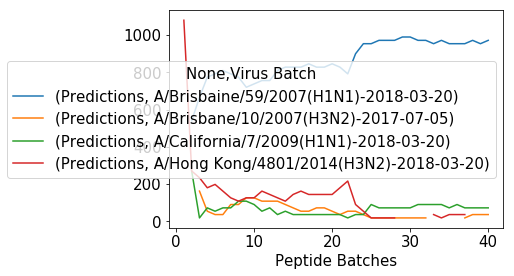

In [25]:
one_virus_data = result[result["y"] == "A/Brisbaine/59/2007(H1N1)-2018-03-20"]
values = pd.DataFrame(one_virus_data.groupby("Peptide Batches")["Predictions"].value_counts())
values.index.names = ['Peptide Batches', 'Virus Batch']
data = pd.pivot_table(values, values=["Predictions"],index=["Peptide Batches"],columns=["Virus Batch"])
data.plot()
plt.show()

In [26]:
one_virus_data.groupby(["Peptide Batches","Collection"]).apply(lambda x:  np.amax(x["Predictions"]))
one_virus_data

one_virus_data[one_virus_data.index.get_level_values("Peptide Batches") == 20]["Predictions"].value_counts().idxmax()

'A/Brisbaine/59/2007(H1N1)-2018-03-20'

In [27]:
result_m = result.groupby(["Peptide Batches","Analyte Batch","Collection"]).apply(lambda x:  x["Predictions"].value_counts().idxmax())
#display(result_m)
result_m = pd.DataFrame(result_m)
result_m = result_m.reset_index().rename(columns={0:"Majority"})
result_m["ms"] = (result_m["Majority"] == result_m["Analyte Batch"]).astype(float)



In [28]:
mpl.rcParams['font.family'] = 'San Francisco'
mpl.rcParams['font.family'] = 'bla'

font = {'family' : 'Roboto',
        'weight' : 'normal',
        'size'   : 15}

mpl.rc('font', **font)

In [29]:
import seaborn as sns


In [30]:
def add_range(df):
    df["unit"]=range(len(df))
    return df

result_mean = result_mean.groupby("Peptide Batches").apply(add_range)

/home/janek89/Envs/flutype_webapp/lib/python3.5/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


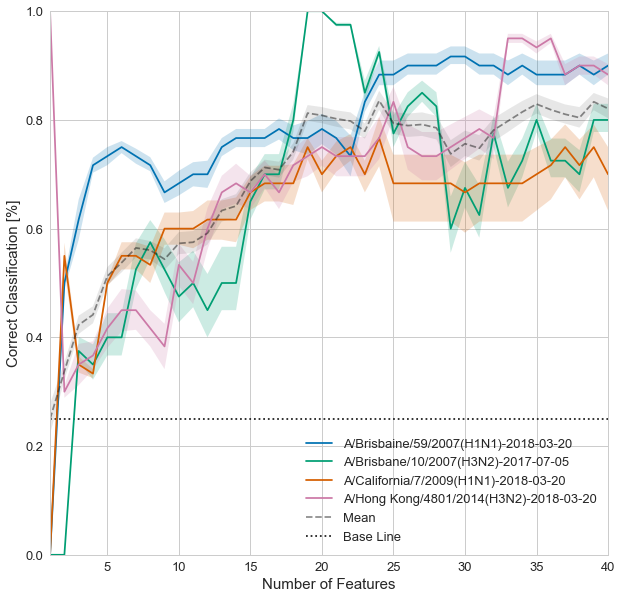

In [35]:
sns.set(style="whitegrid", palette="colorblind", color_codes=True)
fig , ax = plt.subplots(1,1,figsize=(10,10))
ax = sns.tsplot(time="Peptide Batches", value="TrueFalse", unit="Test", condition="Analyte Batch",data=result_mean)
ax = sns.tsplot(time="Peptide Batches", value="TrueFalse", unit="unit", condition="Name", data=result_mean, color="k", linestyle="--", alpha=0.5, err_kws = {'alpha':0.1},legend=True,)
ax.hlines(y = 0.25,xmin=0,xmax=len(pbs),linestyle=":",label="Base Line") 
ax.set_ylim(0,1.0 )
ax.legend(fontsize=13)


plt.xlabel("Number of Features",fontsize=15)
plt.ylabel("Correct Classification [%]",fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.show()

/home/janek89/Envs/flutype_webapp/lib/python3.5/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


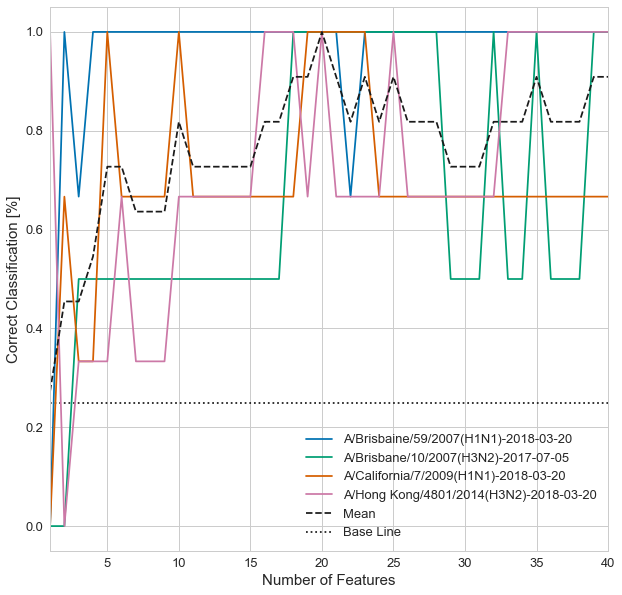

In [38]:
fig , ax = plt.subplots(1,1,figsize=(10,10))
ax = sns.tsplot(time="Peptide Batches", value="ms", unit="Collection", condition="Analyte Batch",data=result_m, ci=False)
mean_data = result_m.groupby(["Peptide Batches"]).mean().reset_index()
x = mean_data["Peptide Batches"] 
y = mean_data["ms"] 
ax.hlines(y = 0.25,xmin=0,xmax=len(pbs),linestyle=":",label="Base Line") 

ax.plot(x,y,c="k",linestyle="--", label = "Mean")
plt.legend()
ax.legend(fontsize=13)


plt.xlabel("Number of Features",fontsize=15)
plt.ylabel("Correct Classification [%]",fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

#ax.set_ylim(0,1.1)
plt.show()

In [ ]:
result_m.groupby(["Peptide Batches"]).mean().reset_index()

In [ ]:
from matplotlib.lines import Line2D

def lda_plot(data, ax,contour=False, **kwargs):
    colors = ["r","g","b","k"]
    cmaps = ["Reds","Greens","Blues","Greys"]
              
    for (n, d),c,cmap in zip(data.groupby("Analyte Batch"),colors,cmaps):
        x = d["Principle 1"]
        y = d["Principle 2"]

        if contour:
            sns.kdeplot(x, y, cmap=cmap, label=n,ax=ax ,  shade=True, shade_lowest=False,**kwargs )
            continue

        
        d.plot.scatter(x="Principle 1",y="Principle 2",ax=ax, label=n,c=c ,**kwargs)

        
def add_legend(data,ax):
    a=[]
    for n,d in data.groupby("Analyte Batch"):
        a.append(n)
    cmaps = ["Reds","Greens","Blues","Greys"]
    cmmaps = [plt.get_cmap(name) for name in cmaps]
    custom_lines = [Line2D([0], [0], color=c(0.8), lw=8) for c in cmmaps]
    ax.legend(custom_lines,a)

In [ ]:
reload(a2)
data = a2.Data(spots_dj=spots_dj).outlier_filtering().sample_on_collection(200).clean()

In [ ]:
sns.set(style="dark", palette="muted", color_codes=True)
fig, ax = plt.subplots(figsize=(15,15))
lda_plot(data1,ax,contour=True,alpha=0.5)
add_legend(data1, ax)
plt.show()

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
std_pca = make_pipeline(StandardScaler(), PCA(n_components=3))

std_pca.fit(data.x)

In [ ]:
dneu = std_pca.transform(data.x)
data1 = pd.DataFrame(dneu[:,1:],index=data.x.index , columns =["Principle 1", "Principle 2"])

In [ ]:
data

In [ ]:
#data1 = pd.DataFrame(data.x_pca_fit().transform(data.x)[:,1:],index=data.x.index , columns =["Principle 1", "Principle 2"])
fig, ax = plt.subplots(figsize=(15,15))
lda_plot(data1,ax,contour=True,alpha=0.5)
add_legend(data1, ax)
plt.show()

In [ ]:
spots_dj = Spot.objects.filter(raw_spot__raw_spot_collection__sid__in=cs)
#spots_dj = spots_dj.filter(raw_spot__lig_fix_batch__sid__in = lb)
spots_dj = spots_dj.filter(spot_collection__sid = "quant1")
spots_dj = spots_dj.filter(circle_quality__gte = 0.3)
data_benchmark = a2.Data(spots_dj=spots_dj)

In [ ]:
data_benchmark = a2.Data(spots_pd=data.spots_pd[(data.spots_pd["Replica"] < 10)])
#data= a2.Data(spots_dj=spots_dj)
data_benchmark.x

In [ ]:
data_benchmark = data_benchmark.outlier_filtering().sample_on_collection(200).clean()

In [ ]:
sns.set(style="whitegrid", palette="muted", color_codes=True)
data1 = pd.DataFrame(data_benchmark.x_pca_fit().transform(data_benchmark.x)[:,:2],index=data_benchmark.x.index , columns =["Principle 1", "Principle 2"])
fig, ax = plt.subplots(figsize=(15,15))
lda_plot(data1,ax,contour=True,alpha=0.5)
add_legend(data1, ax)
plt.show()